# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython
%R require(ggplot2);
%matplotlib inline

# Change directory
%cd /Users/denis/Documents/Projects/analysis-pipelines/geneshot-benchmark/

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


/Users/denis/Documents/Projects/analysis-pipelines/geneshot-benchmark


In [2]:
# Read data
enrichr_dataframe = pd.read_feather('s1-feather.dir/list_off_co.feather').set_index('gene_symbol')
enrichr_dataframe.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,A1BGAS1,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AACS,AACSP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZZEF1,ZZZ3
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BGAS1,821,51,81,35,16,27,77,20,73,30,...,24,27,52,33,29,24,61,44,43,26
A1CF,51,2776,347,106,43,57,151,164,231,41,...,65,125,160,51,73,69,146,131,159,122
A2M,81,347,8431,243,91,112,591,144,380,47,...,178,390,660,120,166,118,219,223,234,198
A2ML1,35,106,243,2677,41,46,222,85,201,86,...,71,141,249,54,44,63,134,59,69,69
A2MP1,16,43,91,41,324,12,34,25,27,25,...,4,7,11,5,8,2,7,9,16,4


## 1. Occurrence distribution

In [23]:
# Get counts
count_dataframe = pd.Series(index=enrichr_dataframe.index, data=np.diag(enrichr_dataframe), name='genesets').to_frame()
count_dataframe.sort_values('genesets', ascending=False).head(10)

,genesets
gene_symbol,
EGR1,19398
FOS,18886
CDKN1A,17645
THBS1,16895
JUN,16669
FN1,16519
DDIT4,16072
TXNIP,15591
MYC,15518


    genesets    
 Min.   :    1  
 1st Qu.:  280  
 Median : 2651  
 Mean   : 2872  
 3rd Qu.: 4539  
 Max.   :19398  


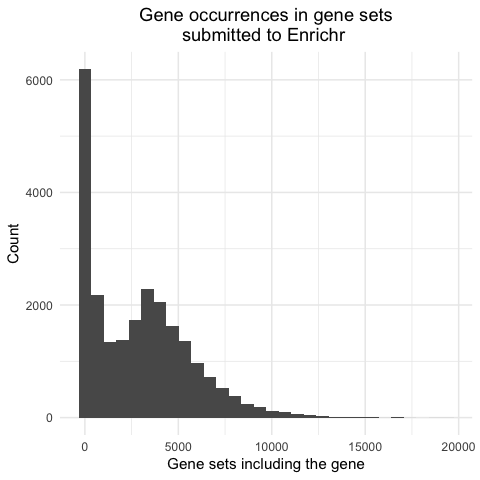

In [25]:
%%R -i count_dataframe -r 100
print(summary(count_dataframe))
ggplot(count_dataframe, aes(x=genesets)) +
    geom_histogram() +
    xlab('Gene sets including the gene') +
    ylab('Count') + 
    ggtitle('Gene occurrences in gene sets\nsubmitted to Enrichr ') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

In [26]:
enrichr_dataframe.head()

,A1BGAS1,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AACS,AACSP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZZEF1,ZZZ3
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BGAS1,821,51,81,35,16,27,77,20,73,30,...,24,27,52,33,29,24,61,44,43,26
A1CF,51,2776,347,106,43,57,151,164,231,41,...,65,125,160,51,73,69,146,131,159,122
A2M,81,347,8431,243,91,112,591,144,380,47,...,178,390,660,120,166,118,219,223,234,198
A2ML1,35,106,243,2677,41,46,222,85,201,86,...,71,141,249,54,44,63,134,59,69,69
A2MP1,16,43,91,41,324,12,34,25,27,25,...,4,7,11,5,8,2,7,9,16,4


In [9]:
enrichr_dataframe2 = enrichr_dataframe.where(np.triu(np.ones(enrichr_dataframe.shape)).astype(np.bool))


In [ ]:
enrichr_dataframe3 = enrichr_dataframe2.stack().reset_index()

In [42]:
# Get gene counts
gene_counts = enrichr_dataframe.max()

# Find gene indices
genes_idx = list(np.where(gene_counts > 50)[0])

# Filter genes
filtered_enrichr_dataframe = enrichr_dataframe.iloc[genes_idx, genes_idx]

# Apply fraction
filtered_enrichr_dataframe = filtered_enrichr_dataframe.apply(lambda x: x/max(x))

# Remove diagonal
np.fill_diagonal(filtered_enrichr_dataframe.values, np.nan)

# Get edges
edge_dataframe = pd.melt(filtered_enrichr_dataframe.reset_index(), id_vars='gene_symbol').dropna()

